In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sympy import *
init_printing()
import xlrd
from itertools import combinations
from itertools import product
from astropy.table import QTable, Table, Column
from astropy import units as u
from IPython.display import HTML

In [2]:
df = pd.read_excel('C:/Users/joeca/Desktop/Finance/FOREX/ForexWorkbook.xlsx')

df = df.fillna(0)

ME = (df.iloc[3:, 15] - 1)*-1

PSL = (df.iloc[3:, 16] - 1)*-1

Net = (df.iloc[3:, 18]) * ME * PSL

WL = np.where(Net > 0, 1, -1)

In [3]:
##
##
## Tier 1 analysis of trades
##
##

Break & One Retest on 1HR:          Total Net =  67.98  Wins/Losses =  -20
Break & Multiple Retests on 1HR:    Total Net =  -25.49  Wins/Losses =  -9
Break & Single Retest on Daily:     Total Net =  -87.67  Wins/Losses =  -16
Break & Multiple Retest on Daily:   Total Net =  -65.16  Wins/Losses =  -6
Rising/Falling Peaks:               Total Net =  33.03  Wins/Losses =  -20
With Channel Over 1 Month:          Total Net =  3.57  Wins/Losses =  -1
With Channel Under 1 Month:         Total Net =  -207.98  Wins/Losses =  -17
Channel Breakout:                   Total Net =  49.58  Wins/Losses =  -5
ICHIMOKU:                   Total Net =  0.0  Wins/Losses =  0


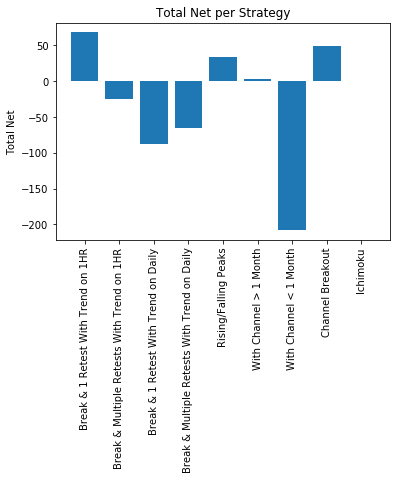

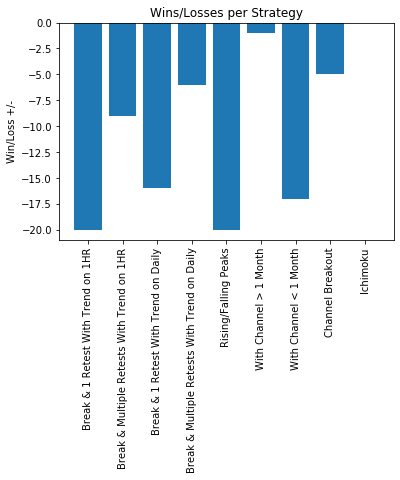

In [4]:
A = df.iloc[3:, 5]
A_Net = sum(A*Net)
A_WL = sum(A*WL)
print("Break & One Retest on 1HR:        ", " Total Net = ", round(A_Net,2), " Wins/Losses = ", A_WL)

B = df.iloc[3:, 6]
B_Net = sum(B*Net)
B_WL = sum(B*WL)
print("Break & Multiple Retests on 1HR:  ", " Total Net = ", round(B_Net,2), " Wins/Losses = ", B_WL)

C = df.iloc[3:, 7]
C_Net = sum(C*Net)
C_WL = sum(C*WL)
print("Break & Single Retest on Daily:   ", " Total Net = ", round(C_Net,2), " Wins/Losses = ", C_WL)

D = df.iloc[3:, 8]
D_Net = sum(D*Net)
D_WL = sum(D*WL)
print("Break & Multiple Retest on Daily: ", " Total Net = ", round(D_Net,2), " Wins/Losses = ", D_WL)

E = df.iloc[3:, 9]
E_Net = sum(E*Net)
E_WL = sum(E*WL)
print("Rising/Falling Peaks:             ", " Total Net = ", round(E_Net,2), " Wins/Losses = ", E_WL)

F = df.iloc[3:, 10]
F_Net = sum(F*Net)
F_WL = sum(F*WL)
print("With Channel Over 1 Month:        ", " Total Net = ", round(F_Net,2), " Wins/Losses = ", F_WL)

G = df.iloc[3:, 11]
G_Net = sum(G*Net)
G_WL = sum(G*WL)
print("With Channel Under 1 Month:       ", " Total Net = ", round(G_Net,2), " Wins/Losses = ", G_WL)

H = df.iloc[3:, 12]
H_Net = sum(H*Net)
H_WL = sum(H*WL)
print("Channel Breakout:                 ", " Total Net = ", round(H_Net,2), " Wins/Losses = ", H_WL)

I = df.iloc[3:, 13]
I_Net = sum(I*Net)
I_WL = sum(I*WL)
print("ICHIMOKU:                 ", " Total Net = ", round(I_Net,2), " Wins/Losses = ", I_WL)

strats = df.iloc[1, 5:14]
y_pos = np.arange(len(strats))
performance = [A_Net,B_Net,C_Net,D_Net,E_Net,F_Net,G_Net,H_Net,I_Net]
perfWL = [A_WL, B_WL, C_WL, D_WL, E_WL, F_WL, G_WL, H_WL, I_WL]

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, strats, rotation='vertical')
plt.ylabel('Total Net')
plt.title('Total Net per Strategy')

plt.show()

plt.bar(y_pos, perfWL, align='center', alpha=1)
plt.xticks(y_pos, strats, rotation='vertical')
plt.ylabel('Win/Loss +/-')
plt.title('Wins/Losses per Strategy')

plt.show()

In [5]:
##
##
## Tier 2 analysis of trades
##
##

In [6]:


## 2-VAR COMBINATIONS ##


Z2 = [A,B,C,D,E,F,G,H,I]

Zcomb2 = list(combinations(Z2, 2))

Zcomb22 = [(x * y) for x, y in Zcomb2]

ZcombNet2 = [x * Net for x in Zcomb22]

ZcombNet22 = [sum(x) for x in ZcombNet2]

Scomb2 = combinations(strats, 2)

r1 = " AND "
Scomb22 = [x + r1 + y for x, y in list(Scomb2)]

ZcombWL2 = [x * WL for x in Zcomb22]

ZcombWL22 = [sum(x) for x in ZcombWL2]

In [7]:


## 3-VAR COMBINATIONS ##


Z3 = [A,B,C,D,E,F,G,H,I]

Zcomb3 = list(combinations(Z3, 3))

Zcomb33 = [(x * y * z) for x, y, z in Zcomb3]

ZcombNet3 = [x * Net for x in Zcomb33]

ZcombNet33 = [sum(x) for x in ZcombNet3]

Scomb3 = combinations(strats, 3)

r1 = " AND "
Scomb33 = [x + r1 + y + r1 + z for x, y, z in list(Scomb3)]

ZcombWL3 = [x * WL for x in Zcomb33]

ZcombWL33 = [sum(x) for x in ZcombWL3]

In [8]:


## 4-VAR COMBINATIONS ##


Z4 = [A,B,C,D,E,F,G,H,I]

Zcomb4 = list(combinations(Z4, 4))

Zcomb44 = [(w * x * y * z) for w, x, y, z in Zcomb4]

ZcombNet4 = [x * Net for x in Zcomb44]

ZcombNet44 = [sum(x) for x in ZcombNet4]

Scomb4 = combinations(strats, 4)

r1 = " AND "
Scomb44 = [w + r1 + x + r1 + y + r1 + z for w, x, y, z in list(Scomb4)]

ZcombWL4 = [x * WL for x in Zcomb44]

ZcombWL44 = [sum(x) for x in ZcombWL4]

In [9]:


## 5-VAR COMBINATIONS ##


Z5 = [A,B,C,D,E,F,G,H,I]

Zcomb5 = list(combinations(Z5, 5))

Zcomb55 = [(v * w * x * y * z) for v, w, x, y, z in Zcomb5]

ZcombNet5 = [x * Net for x in Zcomb55]

ZcombNet55 = [sum(x) for x in ZcombNet5]

Scomb5 = combinations(strats, 5)

r1 = " AND "
Scomb55 = [v + r1 + w + r1 + x + r1 + y + r1 + z for v, w, x, y, z in list(Scomb5)]

ZcombWL5 = [x * WL for x in Zcomb55]

ZcombWL55 = [sum(x) for x in ZcombWL5]

In [10]:
XS = list(strats) + list(Scomb22) + list(Scomb33) + list(Scomb44) + list(Scomb55)

XN = performance + ZcombNet22 + ZcombNet33 + ZcombNet44 + ZcombNet55
XN = np.around(XN, 2)

XW = perfWL + ZcombWL22 + ZcombWL33 + ZcombWL44 + ZcombWL55

T = list(zip(XS,XN,XW))

table = pd.DataFrame(T, columns=['a','b','c'])
table = table[table['b'] !=0]
table = table[table['c'] !=0]
table = table.sort_values(['b', 'c'], ascending=False)

In [11]:
table = table.rename(columns={'a': 'Strategy Combination'})
table = table.rename(columns={'b': 'Total Net'})
table = table.rename(columns={'c': 'Win/Loss +/-'})

In [12]:
HTML(table.to_html(index=False))

Strategy Combination,Total Net,Win/Loss +/-
Break & 1 Retest With Trend on 1HR AND With Channel > 1 Month,245.87,4
Break & Multiple Retests With Trend on 1HR AND Break & 1 Retest With Trend on Daily AND Rising/Falling Peaks,185.30,2
Break & 1 Retest With Trend on 1HR AND With Channel > 1 Month AND Channel Breakout,169.93,4
Break & 1 Retest With Trend on 1HR AND Channel Breakout,155.43,2
Break & Multiple Retests With Trend on 1HR AND Rising/Falling Peaks,148.98,-2
Break & Multiple Retests With Trend on 1HR AND Break & 1 Retest With Trend on Daily,146.00,-1
Rising/Falling Peaks AND Channel Breakout,122.10,1
Break & Multiple Retests With Trend on 1HR AND Rising/Falling Peaks AND Channel Breakout,83.38,-1
Break & Multiple Retests With Trend on 1HR AND Channel Breakout,77.73,-2
Break & 1 Retest With Trend on 1HR AND Rising/Falling Peaks AND With Channel > 1 Month,71.61,2
